<a href="https://colab.research.google.com/github/RhuthuHegde/The-Sparks-Foundation-Internship-program/blob/main/Task6_decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Using Decision Tree Algorithm**
###**Decision Tree Classifier with Python Scikit Learn**


---


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement decision tree classifier. We should be able to visualise it graphically.

**Decision Tree Classifier**

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.
Based on the feature values given we are going to predict if the Species is iris-versicolor or iris-setosa.

**Coded By: Rhuthu Hegde**

**The Sparks Foundation Internship Program**:

Data Science
& Business
Analytics

**June 2021** 


**Importing libraries**

Importing Required Libraries like numpy,pandas,train_test-split etc.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.datasets as datasets

Load the csv file into iris and print it.

In [ ]:
iris=pd.read_csv("/content/Iris.csv")
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


**Feature Selection**

Divide the columns as feature variables and a target variable.

In [ ]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=iris[features]
y=iris.Species

In [ ]:
print("Feature values:\n",x.head())
print("Target values:\n",y.head())

Feature values:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Target values:
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


**Splitting Data**

We split the data into x_train,x_test,y_train,y_test and print it.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (120, 4)
Shape of x_test:  (30, 4)
Shape of y_train:  (120,)
Shape of y_test:  (30,)


**Building Decision Tree model**

Creating a decision tree model using scikit-learn and fitting it on x_train,y-train.

In [ ]:
dtc=DecisionTreeClassifier()
print(dtc.fit(x_train,y_train))
print("Decision tree classifier has been created")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Decision tree classifier has been created


Predicting the target for x_test values.

In [ ]:
ytest_pred=dtc.predict(x_test)

**Evaluating the model**

Use accuracy score to compare the actual values and the predicted values.It tells how accurately the classifier or model can predict the type.

In [ ]:
print("Accuracy of the model after training:\n",metrics.accuracy_score(y_test,ytest_pred))

Accuracy of the model after training:
 0.9666666666666667


**Visualizing the Decision Tree**

Install the graphviz and pydotplus libraries 

In [ ]:
!pip install graphviz
!pip install pydotplus

Import more libraries for visualising the decision tree.
'export_graphviz' is used to convert the decision tree classifier into a dot file while 'pydotplus' is used to convert the dot file into a png file.

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree,
which is then written into out_file. Saves the visualised decision tree into 'iris.png' file.

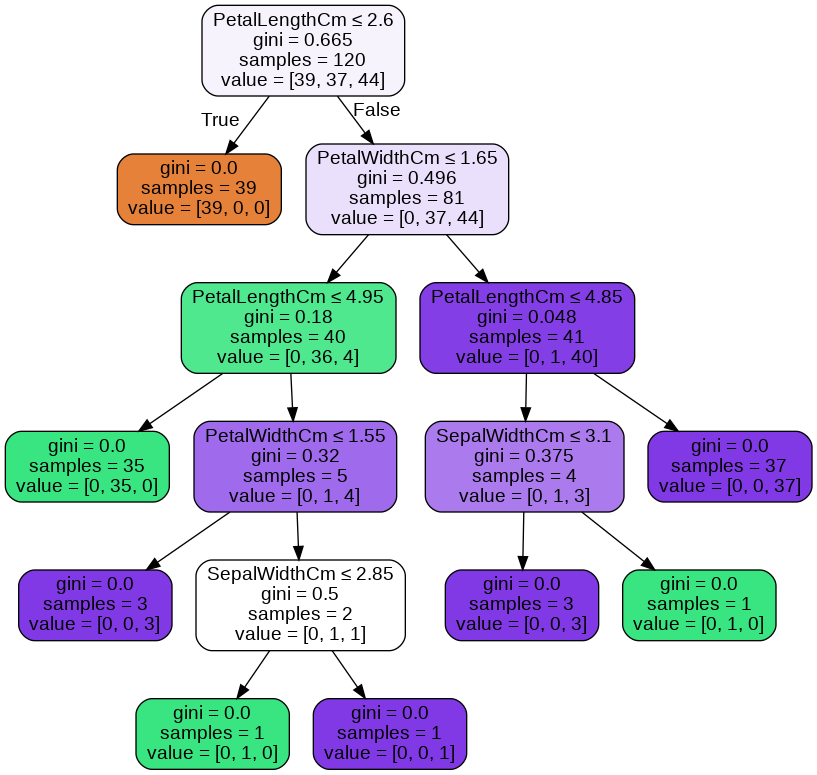

In [ ]:
dot_data=StringIO()
export_graphviz(dtc,out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=features)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

**Pre-pruning**

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.

Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtc.fit(x_train,y_train)
ytest_pred=dtc.predict(x_test)
print("The model has been trained with the classifier again")
print("Accuracy of the prepruned model: ",metrics.accuracy_score(y_test,ytest_pred))

The model has been trained with the classifier again
Accuracy of the prepruned model:  0.9666666666666667


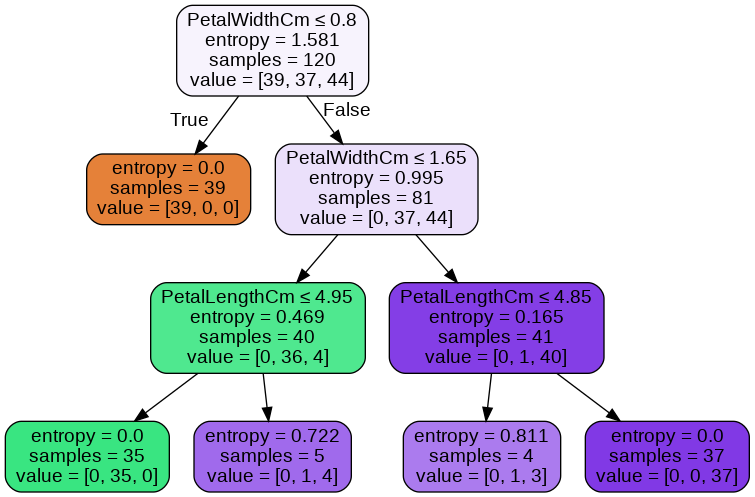

In [ ]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris1.png')
Image(graph.create_png())

The accuracy of the model is same for entropy as well as gini index. But the tree structure is simpler for entropy as a criterion for classification.

In [50]:
print("Accuracy of the model is: ",metrics.accuracy_score(y_test,ytest_pred)*100,"%")

Accuracy of the model is:  96.66666666666667 %


This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.